### mm. yea. explore that data.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
#steam data set
data = pd.read_csv("Data\games-features.csv")

In [4]:
#exclude dupicate games
data = data.drop_duplicates() 
#keep games only
data = data[data.GenreIsNonGame == False]

In [5]:
import re
from collections import OrderedDict
#pattern used for detecting year
pattern = re.compile("\d{4}$")

def year_distrib( gamelist):
    year_distrib = {}
    for index, row in gamelist.iterrows():
        match = pattern.search(row['ReleaseDate'])
        if match:
            year = int(match.group(0))
            if year not in year_distrib:
                year_distrib[year]=0
            year_distrib[year] = year_distrib[year]+1    
    return year_distrib

#divide game by payment type
free_games = data[data.IsFree == True]
paid_games = data[data.PurchaseAvail == True]
sub_games = data[data.SubscriptionAvail == True]

free = year_distrib(free_games)
paid = year_distrib(paid_games)
sub = year_distrib(sub_games)

print("free Games by year:  " + str(sorted(free.items())))
print("total number of free games: "+ str( sum(free.values())))
print()
print("Paid Games:  " + str(sorted(paid.items())))
print("total number of paid games: "+ str( sum(paid.values())))
print()
print("Subscription Games:  " + str(sorted(sub.items())))

free Games by year:  [(2001, 2), (2003, 1), (2004, 1), (2005, 2), (2006, 5), (2007, 5), (2008, 7), (2009, 9), (2010, 5), (2011, 17), (2012, 34), (2013, 39), (2014, 97), (2015, 215), (2016, 510), (2017, 9)]
total number of free games: 958

Paid Games:  [(1997, 1), (1998, 1), (1999, 2), (2000, 2), (2001, 4), (2003, 3), (2004, 7), (2005, 5), (2006, 71), (2007, 111), (2008, 176), (2009, 350), (2010, 309), (2011, 287), (2012, 357), (2013, 491), (2014, 1593), (2015, 2700), (2016, 4014), (2017, 5)]
total number of paid games: 10489

Subscription Games:  [(2010, 1), (2015, 3), (2016, 7)]


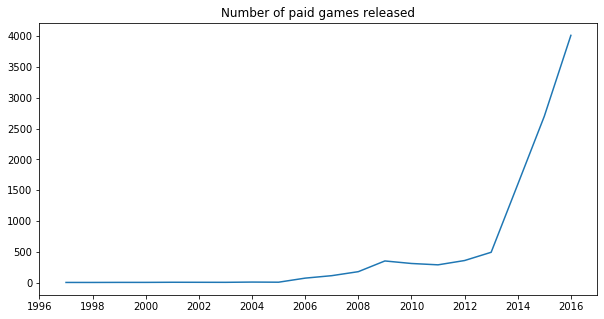

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import seaborn as sns

paid_dist = sorted(paid.items())
plt.figure(figsize=(10,5))
plt.xlim(1996,2017)
plt.xticks(np.arange(1996, 2017, step=2))
plt.plot([i[0]for i in paid_dist][:-1], [i[1]for i in paid_dist][:-1])
plt.title("Number of paid games released")
plt.show()

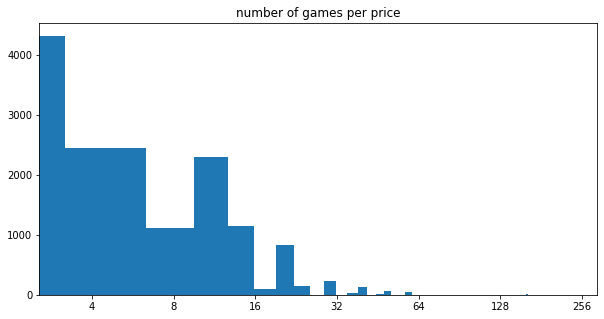

In [7]:
#price distrib

def price_distrib( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price not in price_distrib:
            price_distrib[price]=0
        price_distrib[price] = price_distrib[price]+1    
    return price_distrib


prices = price_distrib(data)
prices = sorted(prices.items())
price = [i[0]for i in prices]
count = [i[1] for i in prices]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#plt.plot(price, count)
plt.hist(price,weights=count, bins = len(price))
plt.xscale("log")
plt.title("number of games per price")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

In [8]:
# avegrage game price
avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)
print("total price: "+ str(avg_price))
print("total games: "+ str(total))
print("average price per game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median game price: "+ str(np.median(list_prices))+" $")

total price: 109725.79000000004
total games: 12985
average price per game: 8.450195610319602 $
median game price: 5.99 $


In [9]:

# avegrage game price\
def price_distrib_paid( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price != 0.0:
            if price not in price_distrib:
                price_distrib[price]=0
            price_distrib[price] = price_distrib[price]+1    
    return price_distrib

prices_paid_games = sorted(price_distrib_paid(paid_games).items())
price_paid = [i[0]for i in prices_paid_games]
count_paid = [i[1] for i in prices_paid_games]

avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price_paid):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)

print("total price: "+ str(avg_price))
print("total paid games: "+ str(total))
print("average price per paid game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median paid game price: "+ str(np.median(list_prices))+" $")

total price: 115219.08000000003
total paid games: 12984
average price per paid game: 8.873927911275418 $
median paid game price: 6.49 $


{0.0: 262573, 0.5: 21343, 0.9: 1077, 0.99: 44363, 1.0: 0, 1.2: 10044, 1.49: 7712, 1.5: 897, 1.87: 60441, 1.95: 0, 1.98: 4842, 1.99: 27099, 2.0: 5022, 2.49: 230703, 2.89: 1614, 2.99: 33621, 3.0: 13631, 3.49: 187241, 3.99: 29667, 4.49: 26364, 4.99: 86508, 5.0: 0, 5.65: 3946, 5.75: 717, 5.99: 52478, 6.49: 109942, 6.99: 60533, 7.49: 195760, 7.99: 85291, 8.98: 22598, 8.99: 56554, 9.69: 23495, 9.99: 166120, 10.0: 12016, 10.99: 10555, 11.15: 897, 11.99: 40089, 12.0: 3946, 12.89: 264182, 12.99: 78796, 13.37: 224366, 13.99: 28724, 14.95: 482988, 14.99: 217051, 15.0: 267709, 15.99: 49172, 16.49: 533, 16.99: 25328, 17.99: 76335, 18.99: 57868, 19.69: 897, 19.99: 429627, 20.0: 666463, 20.99: 181860, 21.99: 167807, 22.99: 3293576, 23.99: 369101, 24.99: 246230, 25.0: 2332, 29.99: 407090, 31.99: 26723, 32.99: 231899, 34.99: 157158, 39.99: 391888, 44.99: 425858, 49.99: 125475, 54.99: 25826, 59.99: 755458, 64.99: 897, 79.99: 6336, 99.99: 474320, 149.99: 0, 159.99: 312158, 234.99: 0}


{0.0: 174097, 0.5:

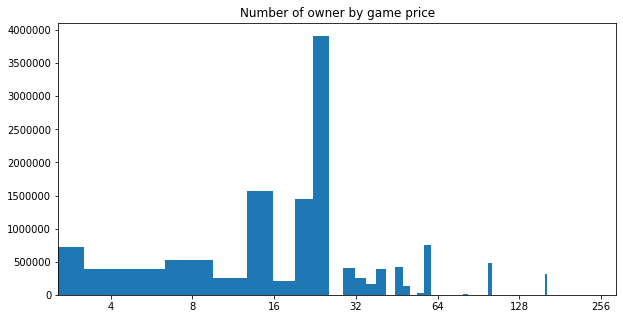

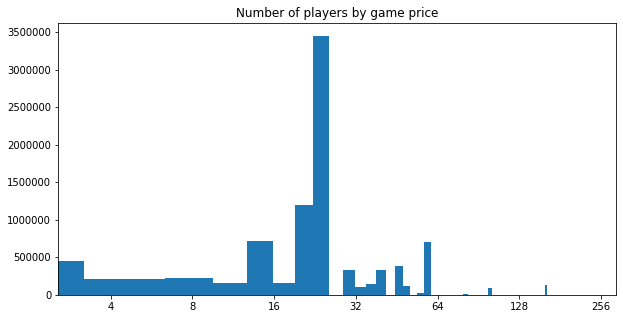

In [10]:


##calculate average owners and avergae players for each price
price_owners = {}
price_players = {}
for p in price:
    #get list of games with price p
    g = data[data.PriceInitial == p]
    nb_games = g.shape[0]
    #calculate avergae owners number
    total_owners = g["SteamSpyOwners"].sum()
    price_owners[p] = int(round(total_owners/nb_games))
    #caluculate avergae player base
    total_players = g["SteamSpyPlayersEstimate"].sum()
    price_players[p] = int(round(total_players/nb_games))

print(price_owners)
print()
print()
print(price_players)

#plt.plot( list(price_owners.keys()), list(price_owners.values()))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.hist( list(price_owners.keys()) ,weights= list(price_owners.values()), bins = len( list(price_owners.keys() ) )    )
plt.xscale("log")
plt.title("Number of owner by game price")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

#24-25$ os a good price for game! unless you are a huge big company

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.hist( list(price_players.keys()) ,weights= list(price_players.values()), bins = len( list(price_players.keys() ) )    )
plt.xscale("log")
plt.title("Number of players by game price")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

In [11]:
import scipy
#use covariance here for the prices?
df = pd.DataFrame({"price": list(price_owners.keys()),
                    "owners": list(price_owners.values())})
print(df.cov())
r, p = scipy.stats.pearsonr(list(price_owners.keys()), list(price_owners.values()))
print()
print("Price-owners corrolation:" + str(r))
print("Price-owners p-value:" + str(p))
print()
print("-----------------------------------------------")
#use covariance here for the prices?
df = pd.DataFrame({"price": list(price_players.keys()),
                    "Players": list(price_players.values())})
print(df.cov())

# how price and player base covary? --- PCA? variance covariance and scipy.stats.pearsonr to calculate correlation coefficient
import scipy
r, p = scipy.stats.pearsonr(list(price_players.keys()),list(price_players.values()))
print()
print("Price-Players corrolation:" + str(r))
print("Price-Players p-value:" + str(p))

price        owners
price   1.487330e+03  1.038569e+06
owners  1.038569e+06  1.632808e+11

Price-owners corrolation:0.06664444664406373
Price-owners p-value:0.5726419844210762

-----------------------------------------------
                 price       Players
price      1487.330430  5.545806e+05
Players  554580.636142  1.367663e+11

Price-Players corrolation:0.03888403801660159
Price-Players p-value:0.7422139459330995


In [48]:
import wikipedia
franchises= wikipedia.WikipediaPage("List of video game franchises").links

In [49]:
franchises_clean = []
#clean the list (get rid of (series))
for i,item in enumerate(franchises):
    if( ("List of" not in item ) and "Lists of" not in item):
        franchises_clean.append(re.sub(r' ?\(.*\)', "", item))
        #franchises[i] = re.sub(r' ?\(.*\)', "", item)


franchises_clean

["'Splosion Man",
 '.hack',
 '1080° Snowboarding',
 '1942',
 '1UP.com',
 '1Up.com',
 '3-D Ultra Pinball',
 '3D Ultra Minigolf',
 '4Gamer.net',
 '7th Dragon',
 'AOL',
 'ARMA',
 'ATV Offroad Fury',
 'A Boy and His Blob',
 'Acclaim Entertainment',
 'Ace Attorney',
 'Ace Combat',
 'Activision',
 'Adventure Gamers',
 'Adventure Island',
 'Adventures of Lolo',
 'Aero Fighters',
 'Aero the Acro-Bat',
 'Aetas',
 'After Burner',
 'Age of Empires',
 'Age of Wonders',
 'Airforce Delta',
 'Aleste',
 'Alex Kidd',
 'Alien Breed',
 'Alien Syndrome',
 'AllGame',
 'Allgame',
 'Alone in the Dark',
 'Alpine Racer',
 'Altered Beast',
 'Alundra',
 "America's Army",
 "American McGee's Alice",
 'Amnesia: The Dark Descent',
 'Amped: Freestyle Snowboarding',
 'Angry Birds',
 'Animal Crossing',
 'Animated series',
 'Anime',
 'Anno',
 'Anomaly: Warzone Earth',
 'Another Code: Two Memories',
 'Ape Escape',
 'Ar Tonelico',
 'Arc the Lad',
 'Arkanoid',
 'Armored Core',
 'Army Men',
 'Army of Two',
 'Art Academy',
 

In [52]:
#Make Network of franchises and titles that belong to it

In [ ]:
#make matrix of game name and franchise it belongs to ----> build network of games linked by franchise---> maybe include other stuf

In [ ]:
# make a prediciton model here?

In [ ]:
#word cloud for genres, names, descriptions?

In [ ]:
# sentiment analysis on name or ddescription ----> metascore? how it effects it

In [ ]:
# distribution of games by genre (for every genre, find the variation of number of games  and number of releases)

In [ ]:
#price vs sales (SteamSpyOwners & SteamSpyPlayersEstimate)
#free vs subscription vs purchase -----> player count recommendation and popularity?

In [ ]:
#find games that have multiple releases (sequals) how does the previous successs influence the new one?

In [ ]:
# meta critic vs name & description (we can also use player base)

In [ ]:
#CategorySinglePlayer	CategoryMultiplayer	CategoryCoop	CategoryMMO	CategoryVRSupport
